In [1]:
import os
import sys
import ROOT
#from PlotStack4l import PlotStack4l
import numpy as np
import math
import argparse
import matplotlib.pyplot as plt

%jsroot on
# voms-proxy-init generated user proxy file to access the xrootd servers
#os.environ['X509_USER_PROXY'] = '/eos/user/b/bockjoo/mySWAN/cmsuser.proxy'
os.environ['X509_USER_PROXY'] = '/home/bockjoo/.cmsuser.proxy'
if os.path.isfile(os.environ['X509_USER_PROXY']):
    pass
else:
    print "os.environ['X509_USER_PROXY'] ",os.environ['X509_USER_PROXY']
    print "You need to put your grid proxy somewhere under /eos/user/<your alpha>/<Username>"
    sys.exit(1)
#os.environ['X509_CERT_DIR'] = '/cvmfs/grid.cern.ch/etc/grid-security/certificates'
#os.environ['X509_VOMS_DIR'] = '/cvmfs/grid.cern.ch/etc/grid-security/vomsdir'
os.environ['X509_CERT_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/certificates'
os.environ['X509_VOMS_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/vomsdir'
    
#root_file="root://cms-xrd-global.cern.ch//store/user/nvanegas/BckgndW+Jets/tag_1_delphes_events01.root"
#tfil = ROOT.TFile(root_file)
#tfil = ROOT.TFile.Open(root_file)

#print "Listing Tree"

#tfil.ls()

Welcome to JupyROOT 6.07/07


In [2]:
# Convert root ntuple format to arrays
def get_data(t):
  weight = []
  pfmet  = []
  mass4l = []
  mT     = []
  dphi   = []
  Dkin   = []
  D      = []
  Ngood  = []
  for evt in t:
    weight.append(evt.f_weight)
    pfmet .append(evt.f_pfmet)
    mass4l.append(evt.f_mass4l)
    mT    .append(evt.f_mT)
    dphi  .append(evt.f_dphi)
    Dkin  .append(evt.f_D_bkg_kin)
    #D     .append(Dmass4l(evt.f_mass4l, evt.f_D_bkg_kin, 0, 199))
    Ngood .append(evt.f_Ngood)
  return (weight, pfmet, mass4l, mT, dphi, Dkin, D, Ngood)


In [3]:
# Calculate the Punzi significance for a signal model, fill hists
def get_punzi(signal, flist, cut_m4l):
  
  # Initialize arrays
  counter_B = np.zeros((len(cut_m4l)))
  counter_S = np.zeros((len(cut_m4l)))
  eff_S     = np.zeros((len(cut_m4l)))
  punzi     = np.zeros((len(cut_m4l)))

  # load bnn
  #record = open('Dmass4l.cpp').read()
  #gROOT.ProcessLine(record)

  # loop through files in filelist, incrementing counters and filling arrays
  for ff in flist:
    
    print ff
    # Get Data
    #f = TFile(f)
    f = ROOT.TFile.Open(ff)
    t = f.Get("HZZ4LeptonsAnalysisReduced")
    weight, pfmet, mass4l, m4lt, dphi, Dkin, D, Ngood = get_data(t)
    
    # Loop through arrays
    for n in range(0, len(weight)):

      # Signal region selection
      if Ngood[n] != 4: continue
      #if pfmet[n] < 140: continue
      if np.abs(mass4l[n] - 125) > 10: continue
      #if m4lt[n] < 280: continue
      #if dphi[n] < 2.8: continue
      #if D[n] > 0.2: continue
    
      # Increment counters
      for i in range(0, len(cut_m4l)):     
         #if np.abs(mass4l[n] - 125) < cut_pfmet[i] and 'Run2016' not in f.GetName() and 'MZp' not in f.GetName(): 
         #    counter_B[i] += weight[n]
         #if np.abs(mass4l[n] - 125) < cut_pfmet[i] and signal in f.GetName():
         #    counter_S[i] += weight[n]
         if mass4l[n] > 125 - cut_m4l[i] and mass4l[n] < 125 + cut_m4l[i] and 'Run2016' not in f.GetName() and 'MZp' not in f.GetName(): 
             counter_B[i] += weight[n]
         if mass4l[n] > 125 - cut_m4l[i] and mass4l[n] < 125 + cut_m4l[i] and signal in f.GetName():
             counter_S[i] += weight[n]
  print counter_B
  print counter_S  
  # Calculate efficiency and Punzi signficance from counter arrays
  for i in range(0, len(cut_m4l)):
    eff_S[i] = counter_S[i]/counter_S[0]
    punzi[i] = (counter_S[i]/counter_S[0]) / (5/2 + np.sqrt(counter_B[i]))
 
  print eff_S
  print punzi
 
  return (punzi, eff_S)


In [5]:
if __name__ == "__main__":
  #print "It is main"
  ## Parse command line arguments
  #parser = argparse.ArgumentParser()
  #parser.add_argument('--channel', required=True, help='Decay channel: 4mu, 4e, or 2e2mu')
  #args = parser.parse_args()
  args_channel = "2e2mu"
  args_channel = "4e"
  args_channel = "4mu" # args_channel = args.channel
  print "Channel : ",args_channel
  
  args_site = "Florida"
  args_monoh_model = "Zp2HDM"
  #if args.site is not None: args_site = args.site 
  #if args.monoh_model is not None : args_monoh_model = args.monoh_model
    
  # Read in file list
  inputfilename='filelist_' + args_channel + '_2016_Spring16_AN_' + args_site + '_noZX.txt'
  print "Site : ",args_site 
  print "Mono Higgs Model : ", args_monoh_model
  print "Filelist : ",inputfilename

  # Read in file list
  #flist = map(lambda x: x.split()[-1], open('filelist_' + args.channel + '_2016_Spring16_AN_Bari_noZX.txt').readlines())
  #flist = map(lambda x: x.split()[-1], open('filelist_' + args_channel + '_2016_Spring16_AN_Florida_noZX.txt').readlines())
  flist = map(lambda x: x.split()[-1], open( inputfilename ).readlines())
  
  # Define range and step size for met cut


Channel :  4mu
Site :  Florida
Mono Higgs Model :  Zp2HDM
Filelist :  filelist_4mu_2016_Spring16_AN_Florida_noZX.txt


In [6]:
  #cut_pfmet = np.arange(1, 500, 25)
  cut_m4l = np.arange(1, 65, 1)
  #cut_pfmet = np.arange(1, 8, 0.25)
  print cut_m4l


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


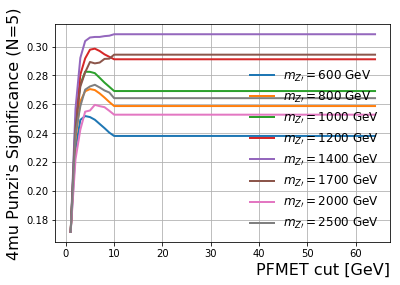

600
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_

In [ ]:
  #for ff in flist:
  #  f = ROOT.TFile.Open(ff)
  #  t = f.Get("HZZ4LeptonsAnalysisReduced")
  #  t.Print()
  #  break
  # for i in $(grep ZpBaryonic filelist_2e2mu_2016_Spring16_AN_Florida_noZX.txt | grep MChi-1_ | sed 's|_MChi-1| _MChi-1|g' | sed 's|_MZp-| |g' | awk '{print $2}' | sort -n) ; do  echo ZpBaryonic_MZp-${i}_MChi-1 ; done
  #ZpBaryonic_MZp-10_MChi-1
  #ZpBaryonic_MZp-20_MChi-1
  #ZpBaryonic_MZp-50_MChi-1
  #ZpBaryonic_MZp-100_MChi-1
  #ZpBaryonic_MZp-200_MChi-1
  #ZpBaryonic_MZp-300_MChi-1
  #ZpBaryonic_MZp-500_MChi-1
  #ZpBaryonic_MZp-1000_MChi-1
  #ZpBaryonic_MZp-2000_MChi-1
  #ZpBaryonic_MZp-10000_MChi-1
  #
  # for i in $(grep ZpBaryonic filelist_2e2mu_2016_Spring16_AN_Florida_noZX.txt | grep MChi-1_ | sed 's|_MChi-1| _MChi-1|g' | sed 's|_MZp-| |g' | awk '{print $2}' | sort -n) ; do  echo " "" "print $i ; echo " "" "punzi${i},  eff_S${i}  = "get_punzi('ZpBaryonic_MZp-${i}_MChi-1', flist, cut_m4l)" ; done
  # Return signal efficiency and punzi significance for different signals
  if 'Zp2HDM' in args_monoh_model :
    print 600
    punzi600,  eff_S600  = get_punzi('2HDM_MZp-600_MA0-300', flist, cut_m4l)
    print 800
    punzi800,  eff_S800  = get_punzi('2HDM_MZp-800_MA0-300', flist, cut_m4l)
    print 1000
    punzi1000, eff_S1000 = get_punzi('2HDM_MZp-1000_MA0-300', flist, cut_m4l)
    print 1200
    punzi1200, eff_S1200 = get_punzi('2HDM_MZp-1200_MA0-300', flist, cut_m4l)
    print 1400
    punzi1400, eff_S1400 = get_punzi('2HDM_MZp-1400_MA0-300', flist, cut_m4l)
    print 1700
    punzi1700, eff_S1700 = get_punzi('2HDM_MZp-1700_MA0-300', flist, cut_m4l)
    print 2000
    punzi2000, eff_S2000 = get_punzi('2HDM_MZp-2000_MA0-300', flist, cut_m4l)
    print 2500
    punzi2500, eff_S2500 = get_punzi('2HDM_MZp-2500_MA0-300', flist, cut_m4l)

    # Print optimal significance and MET cuts
    print 'MZP [GeV]      | 600  | 800  | 1000 | 1200 | 1400 | 1700 | 2000 | 2500'
    print 'Max punzi      | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f' % (max(punzi600), max(punzi800), max(punzi1000), max(punzi1200), max(punzi1400), max(punzi1700), max(punzi2000), max(punzi2500))
    print 'MET cut [GeV]  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f' % (cut_m4l[np.argmax(punzi600)], cut_m4l[np.argmax(punzi800)], cut_m4l[np.argmax(punzi1000)], cut_m4l[np.argmax(punzi1200)], cut_m4l[np.argmax(punzi1400)], cut_m4l[np.argmax(punzi1700)], cut_m4l[np.argmax(punzi2000)], cut_m4l[np.argmax(punzi2500)])
  elif 'ZpBaryonic' in args_monoh_model :
    print 10
    punzi10,  eff_S10  = get_punzi('ZpBaryonic_MZp-10_MChi-1', flist, cut_m4l)
    print 20
    punzi20,  eff_S20  = get_punzi('ZpBaryonic_MZp-20_MChi-1', flist, cut_m4l)
    print 50
    punzi50, eff_S50 = get_punzi('ZpBaryonic_MZp-50_MChi-1', flist, cut_m4l)
    print 100
    punzi100, eff_S100 = get_punzi('ZpBaryonic_MZp-100_MChi-1', flist, cut_m4l)
    print 200
    punzi200, eff_S200 = get_punzi('ZpBaryonic_MZp-200_MChi-1', flist, cut_m4l)
    print 300
    punzi300, eff_S300 = get_punzi('ZpBaryonic_MZp-300_MChi-1', flist, cut_m4l)
    print 500
    punzi500, eff_S500 = get_punzi('ZpBaryonic_MZp-500_MChi-1', flist, cut_m4l)
    print 1000
    punzi1000, eff_S1000 = get_punzi('ZpBaryonic_MZp-1000_MChi-1', flist, cut_m4l)
    print 2000
    punzi2000, eff_S2000 = get_punzi('ZpBaryonic_MZp-2000_MChi-1', flist, cut_m4l)
    print 10000
    punzi10000, eff_S10000 = get_punzi('ZpBaryonic_MZp-10000_MChi-1', flist, cut_m4l)


    # In[24]:
    #line1="  print 'MZP [GeV]      "
    #line2="  print 'Max punzi      "
    #line3="  print 'MET cut [GeV]  "
    #for i in $(grep ZpBaryonic filelist_2e2mu_2016_Spring16_AN_Florida_noZX.txt | grep MChi-1_ | sed 's|_MChi-1| _MChi-1|g' | sed 's|_MZp-| |g' | awk '{print $2}' | sort -n) ; do
    # line1="${line1}| $i " ; line2="${line2}| %.2f" ; line3="${line3}| %3.2f"
    #done
    #line1="${line1}'"
    #line2="${line2}' % ("
    #line3="${line3}' % ("
    #for i in $(grep ZpBaryonic filelist_2e2mu_2016_Spring16_AN_Florida_noZX.txt | grep MChi-1_ | sed 's|_MChi-1| _MChi-1|g' | sed 's|_MZp-| |g' | awk '{print $2}' | sort -n) ; do
    #  line2="${line2}max(punzi${i})," ; line3="${line3}cut_m4l[np.argmax(punzi${i})],"
    #done
    #line2=" "" "$(echo $line2 | sed 's#),$#))#') 
    #line3=" "" "$(echo $line3 | sed 's#\],$#\]),#') 
    # Print optimal significance and MET cuts
    print 'MZP [GeV] | 10 | 20 | 50 | 100 | 200 | 300 | 500 | 1000 | 2000 | 10000 '
    #print 'MZP [GeV]      | 600  | 800  | 1000 | 1200 | 1400 | 1700 | 2000 | 2500'
    #print 'Max punzi      | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f' % (max(punzi600), max(punzi800), max(punzi1000), max(punzi1200), max(punzi1400), max(punzi1700), max(punzi2000), max(punzi2500))
    print 'Max punzi | %.2f| %.2f| %.2f| %.2f| %.2f| %.2f| %.2f| %.2f| %.2f| %.2f' % (max(punzi10),max(punzi20),max(punzi50),max(punzi100),max(punzi200),max(punzi300),max(punzi500),max(punzi1000),max(punzi2000),max(punzi10000))
    #print 'MET cut [GeV]  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f' % (cut_m4l[np.argmax(punzi600)], cut_m4l[np.argmax(punzi800)], cut_m4l[np.argmax(punzi1000)], cut_m4l[np.argmax(punzi1200)], cut_m4l[np.argmax(punzi1400)], cut_m4l[np.argmax(punzi1700)], cut_m4l[np.argmax(punzi2000)], cut_m4l[np.argmax(punzi2500)])
    print 'M4l cut [GeV] | %3.2f| %3.2f| %3.2f| %3.2f| %3.2f| %3.2f| %3.2f| %3.2f| %3.2f| %3.2f' % (cut_m4l[np.argmax(punzi10)],cut_m4l[np.argmax(punzi20)],cut_m4l[np.argmax(punzi50)],cut_m4l[np.argmax(punzi100)],cut_m4l[np.argmax(punzi200)],cut_m4l[np.argmax(punzi300)],cut_m4l[np.argmax(punzi500)],cut_m4l[np.argmax(punzi1000)],cut_m4l[np.argmax(punzi2000)],cut_m4l[np.argmax(punzi10000)])

  # In[26]:
  # Format plots
  plt.figure(1)
  #for i in $(grep ZpBaryonic filelist_2e2mu_2016_Spring16_AN_Florida_noZX.txt | grep MChi-1_ | sed 's|_MChi-1| _MChi-1|g' | sed 's|_MZp-| |g' | awk '{print $2}' | sort -n) ; do   echo " "" ""plt.plot(cut_m4l, punzi${i},  linewidth=2.0, label=r'$m_{Z\prime} = ${i} \rm{\ GeV}$')" ; done  
  if 'Zp2HDM' in args_monoh_model :
    plt.plot(cut_m4l, punzi600,  linewidth=2.0, label=r'$m_{Z\prime} = 600 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi800,  linewidth=2.0, label=r'$m_{Z\prime} = 800 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi1000, linewidth=2.0, label=r'$m_{Z\prime} = 1000 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi1200, linewidth=2.0, label=r'$m_{Z\prime} = 1200 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi1400, linewidth=2.0, label=r'$m_{Z\prime} = 1400 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi1700, linewidth=2.0, label=r'$m_{Z\prime} = 1700 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi2000, linewidth=2.0, label=r'$m_{Z\prime} = 2000 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi2500, linewidth=2.0, label=r'$m_{Z\prime} = 2500 \rm{\ GeV}$')
  elif 'ZpBaryonic' in args_monoh_model :
    plt.plot(cut_m4l, punzi10,  linewidth=2.0, label=r'{Z\prime} = 10 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi20,  linewidth=2.0, label=r'{Z\prime} = 20 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi50,  linewidth=2.0, label=r'{Z\prime} = 50 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi100,  linewidth=2.0, label=r'{Z\prime} = 100 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi200,  linewidth=2.0, label=r'{Z\prime} = 200 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi300,  linewidth=2.0, label=r'{Z\prime} = 300 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi500,  linewidth=2.0, label=r'{Z\prime} = 500 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi1000,  linewidth=2.0, label=r'{Z\prime} = 1000 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi2000,  linewidth=2.0, label=r'{Z\prime} = 2000 \rm{\ GeV}$')
    plt.plot(cut_m4l, punzi10000,  linewidth=2.0, label=r'{Z\prime} = 10000 \rm{\ GeV}$')

  #plt.axis([0, 500, 0, 0.5])
  plt.ylabel(args_channel + ' Punzi\'s Significance (N=5)', fontsize=16)
  plt.xlabel('dm4l cut [GeV]', horizontalalignment='right', x=1.0, fontsize=16)
  #plt.xlabel(r'$M_{llll} \rm{\ cut\ [GeV]}$', horizontalalignment='right', x=1.0, fontsize=16)
  plt.grid(True)
  plt.legend(loc='best', frameon=False, prop={'size':12})
  figout = args_channel + '_punzi_m4l_'+args_monoh_model+'.png'
  plt.savefig( figout )
  print "Figure ", figout, " is saved"  
  #plt.savefig(args.channel + '_punzi_m4l.png')
 
  #plt.figure(2)
  #plt.plot(cut_m4l, eff_S600,  linewidth=2.0, label=r'$m_{Z\prime} = 600 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S800,  linewidth=2.0, label=r'$m_{Z\prime} = 800 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S1000, linewidth=2.0, label=r'$m_{Z\prime} = 1000 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S1200, linewidth=2.0, label=r'$m_{Z\prime} = 1200 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S1400, linewidth=2.0, label=r'$m_{Z\prime} = 1400 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S1700, linewidth=2.0, label=r'$m_{Z\prime} = 1700 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S2000, linewidth=2.0, label=r'$m_{Z\prime} = 2000 \rm{GeV}$')
  #plt.plot(cut_m4l, eff_S2500, linewidth=2.0, label=r'$m_{Z\prime} = 2500 \rm{GeV}$')
  #plt.axis([0, 500, 0, 1.1])
  #plt.ylabel(args.channel + ' Signal Efficiency', horizontalalignment='right', y=1.0, fontsize=18)
  #plt.xlabel('MET cut [GeV]', horizontalalignment='right', x=1.0, fontsize=18)
  #plt.grid(True)
  #plt.legend(loc='best', frameon=False, prop={'size':14})
  #plt.savefig(args.channel + '_eff_met.png')

  plt.show()
  # The End
